In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
def plot_model_fps(fps, latents = None, q_thresh = 1e-5, label = "Model"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x_star = fps.xstar
    q_star = fps.qstar
    q_flag = q_star < q_thresh
    stability= fps.is_stable
    x_star = x_star[q_flag]
    q_star = q_star[q_flag]
    pca = PCA(n_components=3)
    if latents is not None:
        lats_flat = latents.reshape(-1, latents.shape[-1])
        lats_flat = pca.fit_transform(lats_flat)
        lats_pca = lats_flat.reshape(latents.shape[0], latents.shape[1], 3)
        x_star = pca.transform(x_star)
        for i in range(30):
            ax.plot(lats_pca[i,:,0], lats_pca[i,:,1], lats_pca[i,:,2], linewidth=0.5)
    else:
        x_star = pca.fit_transform(x_star)
    stability = stability[q_flag]
    stable_X = x_star[stability]
    unstable_X = x_star[~stability]
    ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
    ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
    ax.set_title(f"{label} FPS")
    ax.legend()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.savefig(f"fps_{label}.pdf")

In [3]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240503_Fig1_NBFF_NoisyGRU/max_epochs=500 n_samples=1000 latent_size=64 seed=0 learning_rate=0.001/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
# path_LFADS = pathTT + "20240518_LFADS_Input_Inf_Sweep/"
path_LFADS = pathTT + "20240524_LFADS_Input_Inf_Sweep_Random2/"

subfolders_LFADS = [f.path for f in os.scandir(path_LFADS) if f.is_dir()]

comparison = Comparison(comparison_tag = "Input_InfTest_Sweep_Random")
comparison.load_analysis(an_TT, reference_analysis=True)
for subfolder in subfolders_LFADS:
    final_folder = subfolder.split("/")[-1]
    subfolder = subfolder + "/"
    # Find the co_prior + kl_co_scale in the folder name
    co_kl = float(final_folder.split("kl_co_scale=")[1].split(" ")[0])
    seed = int(final_folder.split("seed=")[1].split(" ")[0])

    analysis_GRU = Analysis_DT(run_name = f"LFADS_co_kl_{co_kl}_{seed}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = f"CO_KL_{co_kl}")#co_kl_{co_kl}")

comparison.regroup()

/home/csverst/Github/CtDBenchmark/


Working on 1 of 101: LFADS_co_kl_0.0001229236009339407_0
Group: CO_KL_0.0001229236009339407
Rate R2: 0.8329220722935691
State R2: 0.9223937720646839
Input R2 (toInf): 0.17252545781157924
Input R2 (toTrue): 0.17209871926826326
Working on 2 of 101: LFADS_co_kl_0.0001431347717558173_0
Group: CO_KL_0.0001431347717558173
Rate R2: 0.8307808846571845
State R2: 0.921446700206927
Input R2 (toInf): 0.16438065336196003
Input R2 (toTrue): 0.16396756493524667
Working on 3 of 101: LFADS_co_kl_0.0001510921402611247_0
Group: CO_KL_0.0001510921402611247
Rate R2: 0.8308409485782101
State R2: 0.9218428351582275
Input R2 (toInf): 0.163149852383019
Input R2 (toTrue): 0.162923744437074
Working on 4 of 101: LFADS_co_kl_0.00016915420255994167_0
Group: CO_KL_0.00016915420255994167
Rate R2: 0.8298426883371331
State R2: 0.9219856894942293
Input R2 (toInf): 0.15668600247386666
Input R2 (toTrue): 0.1564710101450026
Working on 5 of 101: LFADS_co_kl_0.00017384477013255399_0
Group: CO_KL_0.00017384477013255399
Rate R

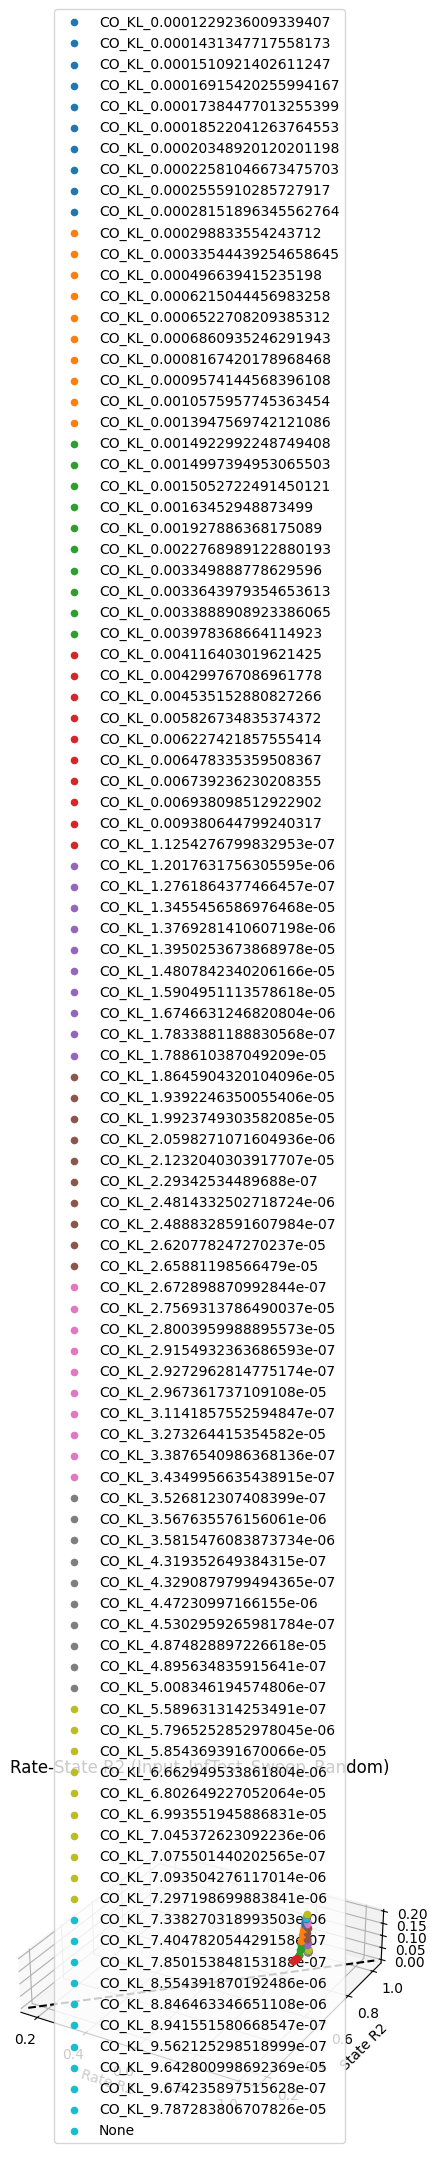

In [4]:
plot_dict = {
    "save_pdf": True,
    "ax_lim": [0.15, 1.05],
    "marker": "o",
}
rate_state_inputs= comparison.plot_rate_state_input_r2(plot_dict = plot_dict)

In [5]:
# rate_state= comparison.compare_rate_state_r2(plot_dict = plot_dict)
def group_indices(groups):
    group_dict = {}
    for index, group in enumerate(groups):
        if group in group_dict:
            group_dict[group].append(index)
        else:
            group_dict[group] = [index]
    return group_dict
groups = comparison.groups
group_dict = group_indices(groups)
print(group_dict)

{'CO_KL_0.0001229236009339407': [0], 'CO_KL_0.0001431347717558173': [1], 'CO_KL_0.0001510921402611247': [2], 'CO_KL_0.00016915420255994167': [3], 'CO_KL_0.00017384477013255399': [4], 'CO_KL_0.00018522041263764553': [5], 'CO_KL_0.00020348920120201198': [6], 'CO_KL_0.00022581046673475703': [7], 'CO_KL_0.0002555910285727917': [8], 'CO_KL_0.00028151896345562764': [9], 'CO_KL_0.000298833554243712': [10], 'CO_KL_0.00033544439254658645': [11], 'CO_KL_0.000496639415235198': [12], 'CO_KL_0.0006215044456983258': [13], 'CO_KL_0.0006522708209385312': [14], 'CO_KL_0.0006860935246291943': [15], 'CO_KL_0.0008167420178968468': [16], 'CO_KL_0.0009574144568396108': [17], 'CO_KL_0.0010575957745363454': [18], 'CO_KL_0.0013947569742121086': [19], 'CO_KL_0.0014922992248749408': [20], 'CO_KL_0.0014997394953065503': [21], 'CO_KL_0.0015052722491450121': [22], 'CO_KL_0.00163452948873499': [23], 'CO_KL_0.001927886368175089': [24], 'CO_KL_0.0022768989122880193': [25], 'CO_KL_0.003349888778629596': [26], 'CO_KL_0.

CO_KL_0.0001229236009339407
CO_KL_0.0001431347717558173
CO_KL_0.0001510921402611247
CO_KL_0.00016915420255994167
CO_KL_0.00017384477013255399
CO_KL_0.00018522041263764553
CO_KL_0.00020348920120201198
CO_KL_0.00022581046673475703
CO_KL_0.0002555910285727917
CO_KL_0.00028151896345562764
CO_KL_0.000298833554243712
CO_KL_0.00033544439254658645
CO_KL_0.000496639415235198
CO_KL_0.0006215044456983258
CO_KL_0.0006522708209385312
CO_KL_0.0006860935246291943
CO_KL_0.0008167420178968468
CO_KL_0.0009574144568396108
CO_KL_0.0010575957745363454
CO_KL_0.0013947569742121086


<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_3110139/2353215491.py:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if key is not "None":


CO_KL_0.0014922992248749408
CO_KL_0.0014997394953065503
CO_KL_0.0015052722491450121
CO_KL_0.00163452948873499
CO_KL_0.001927886368175089
CO_KL_0.0022768989122880193
CO_KL_0.003349888778629596
CO_KL_0.0033643979354653613
CO_KL_0.0033888908923386065
CO_KL_0.003978368664114923
CO_KL_0.004116403019621425
CO_KL_0.004299767086961778
CO_KL_0.004535152880827266
CO_KL_0.005826734835374372
CO_KL_0.006227421857555414
CO_KL_0.006478335359508367
CO_KL_0.006739236230208355
CO_KL_0.006938098512922902
CO_KL_0.009380644799240317
CO_KL_1.1254276799832953e-07
CO_KL_1.2017631756305595e-06
CO_KL_1.2761864377466457e-07
CO_KL_1.3455456586976468e-05
CO_KL_1.3769281410607198e-06
CO_KL_1.3950253673868978e-05
CO_KL_1.4807842340206166e-05
CO_KL_1.5904951113578618e-05
CO_KL_1.6746631246820804e-06
CO_KL_1.7833881188830568e-07
CO_KL_1.788610387049209e-05
CO_KL_1.8645904320104096e-05
CO_KL_1.9392246350055406e-05
CO_KL_1.9923749303582085e-05
CO_KL_2.0598271071604936e-06
CO_KL_2.1232040303917707e-05
CO_KL_2.29342534489

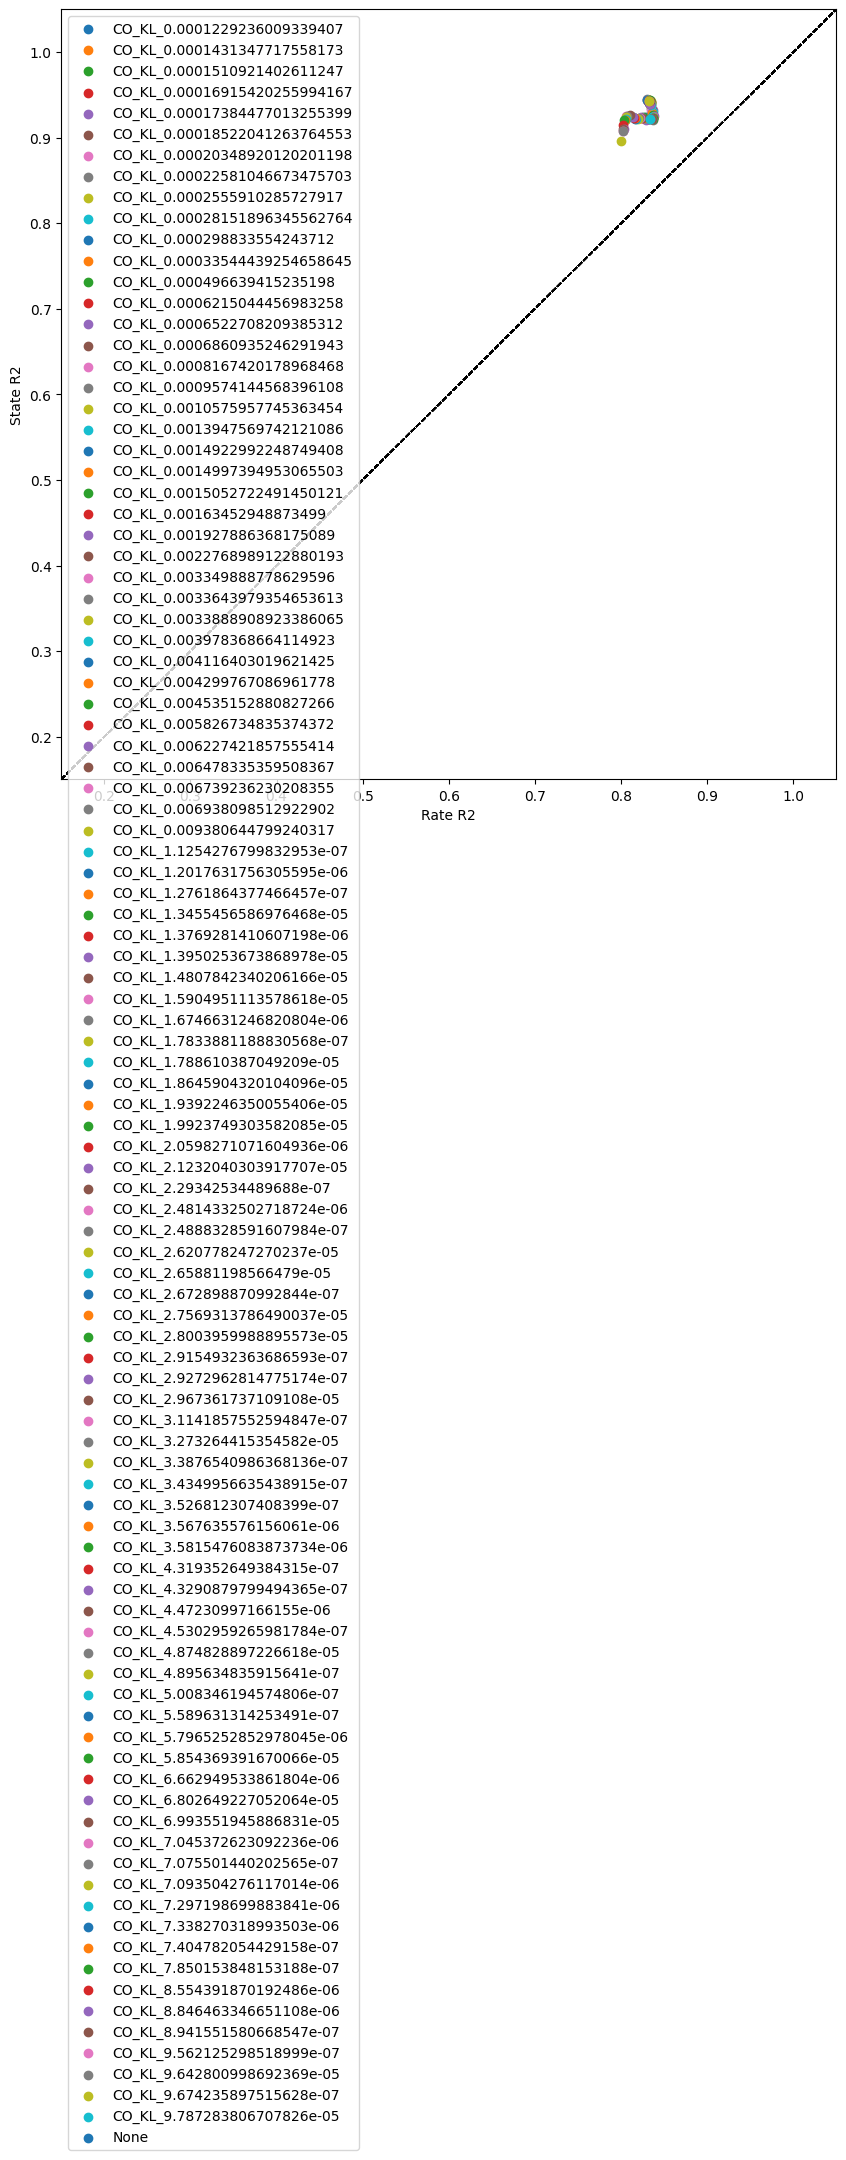

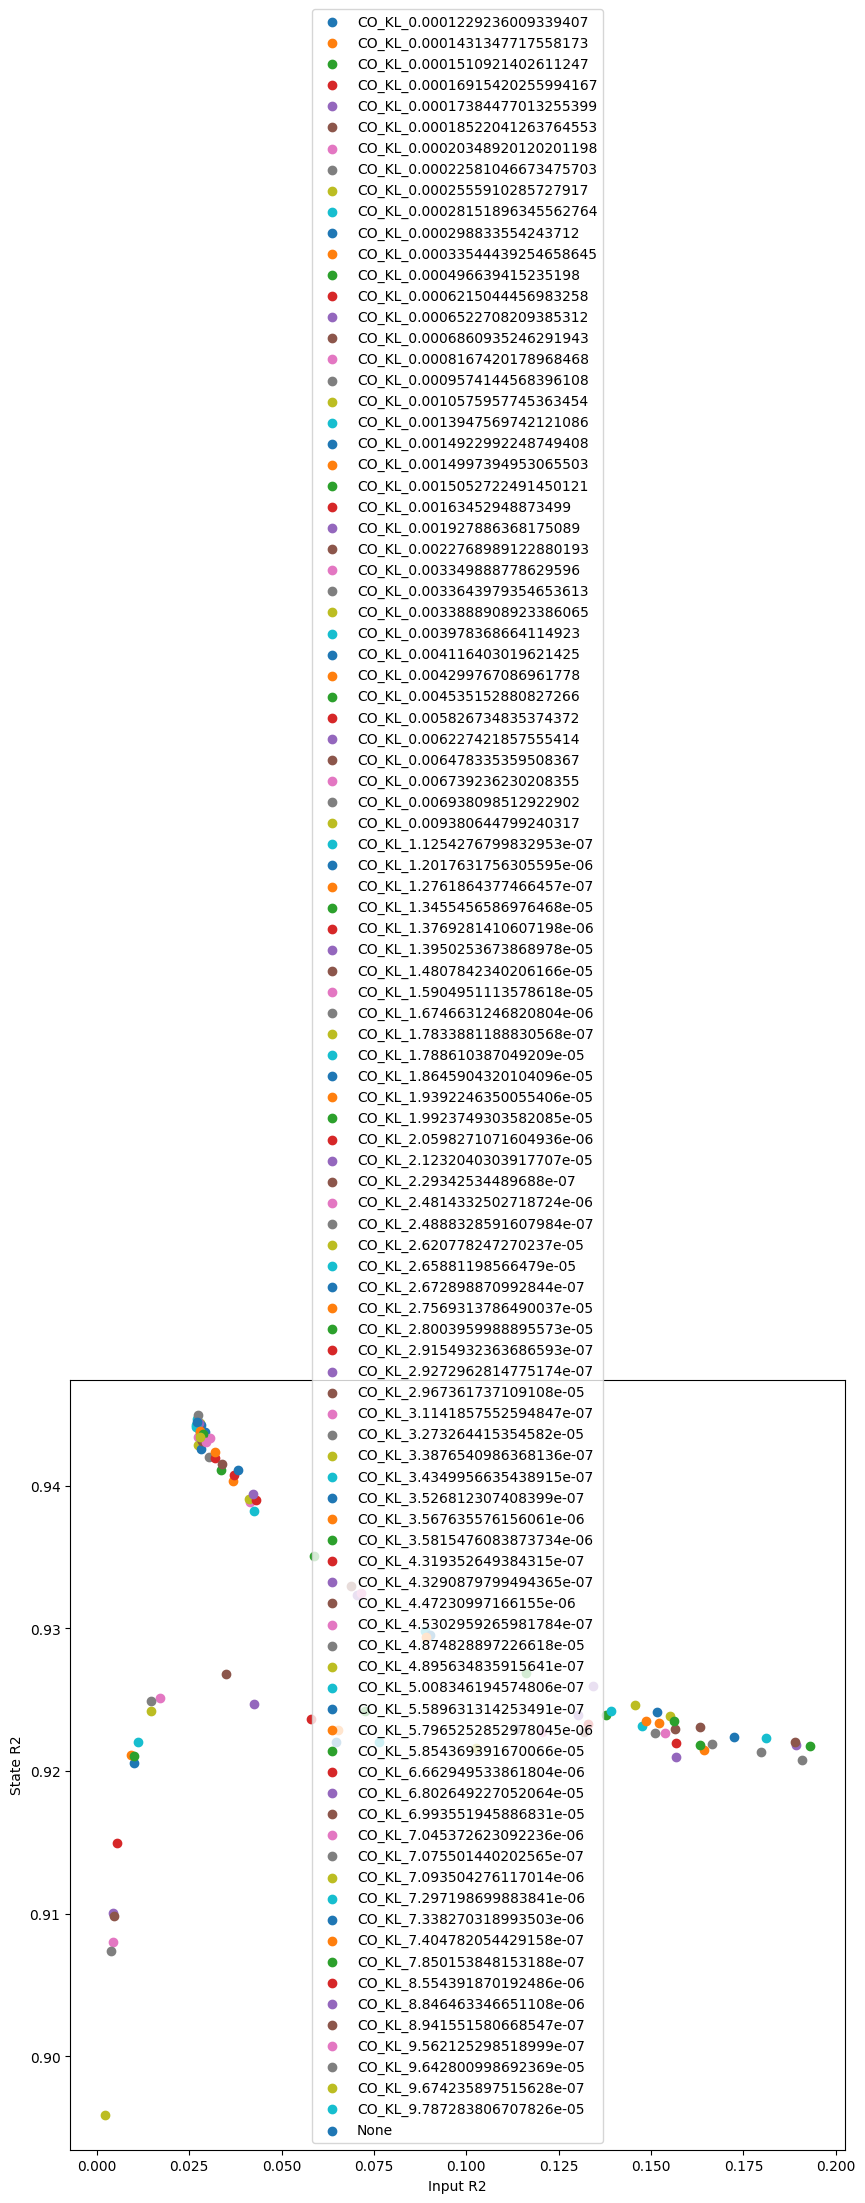

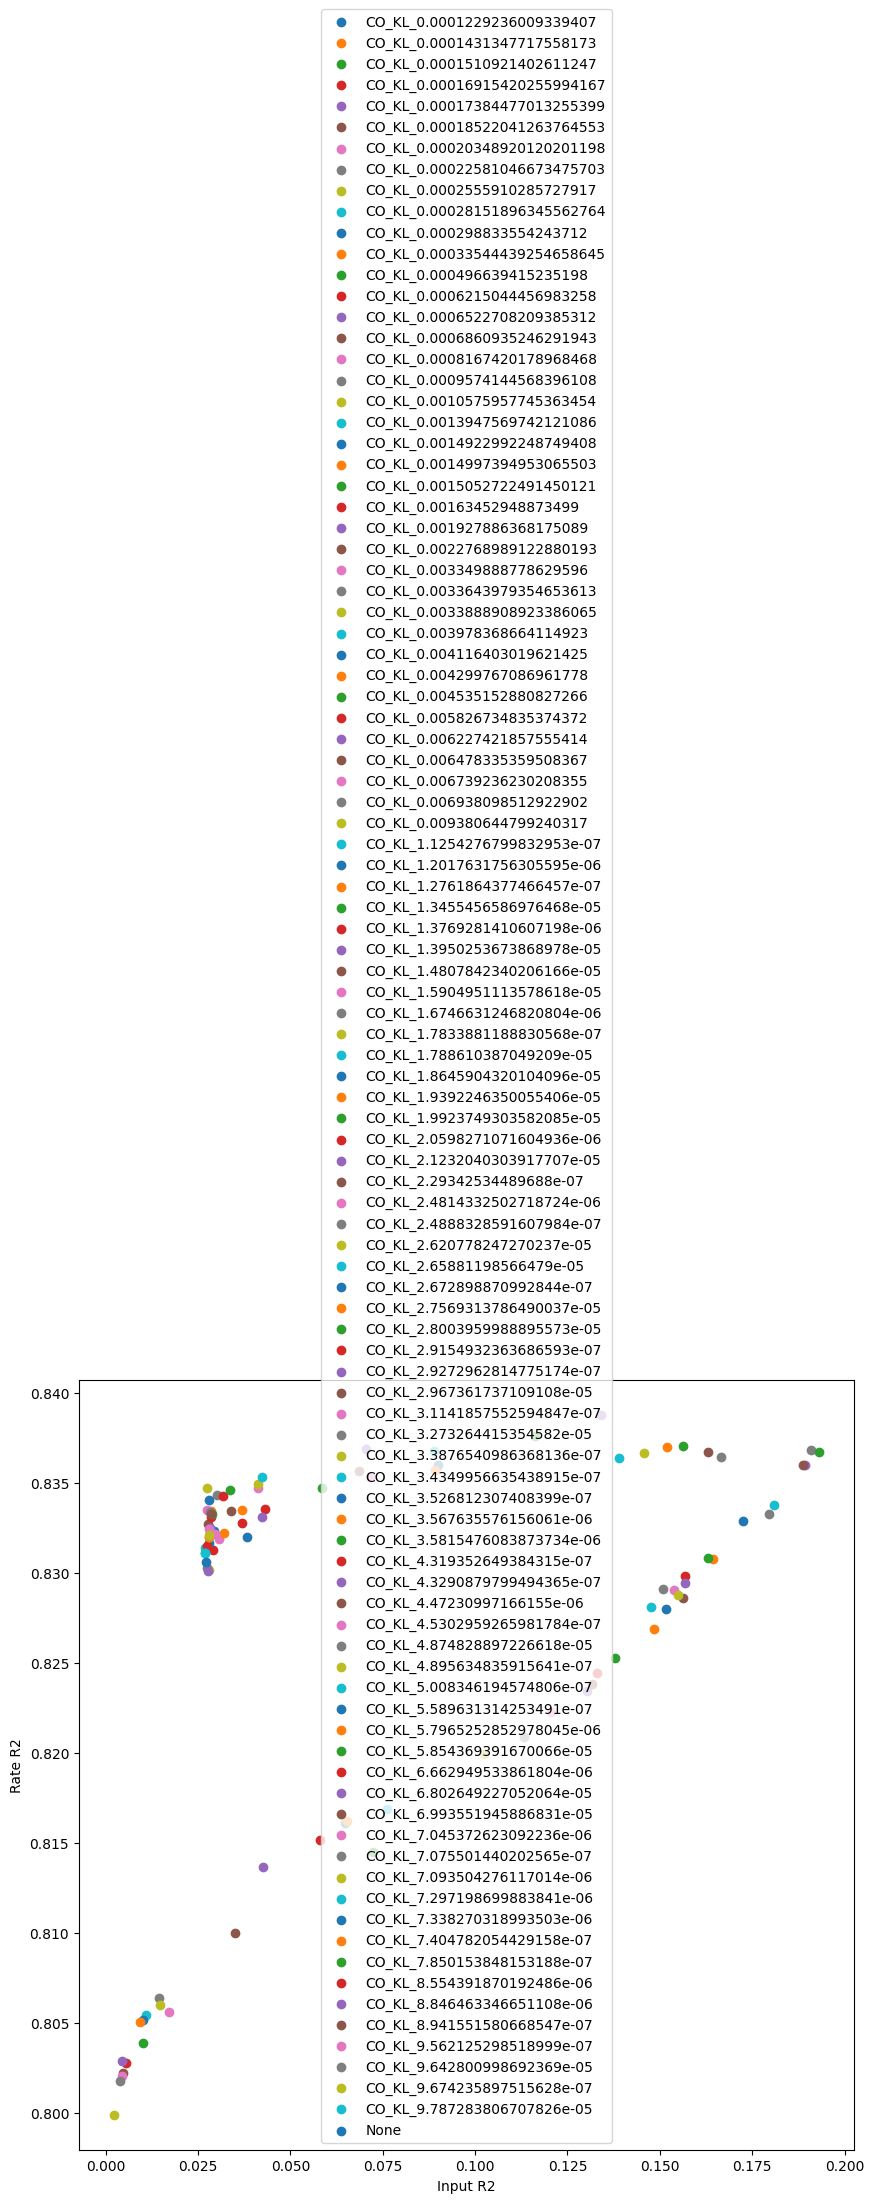

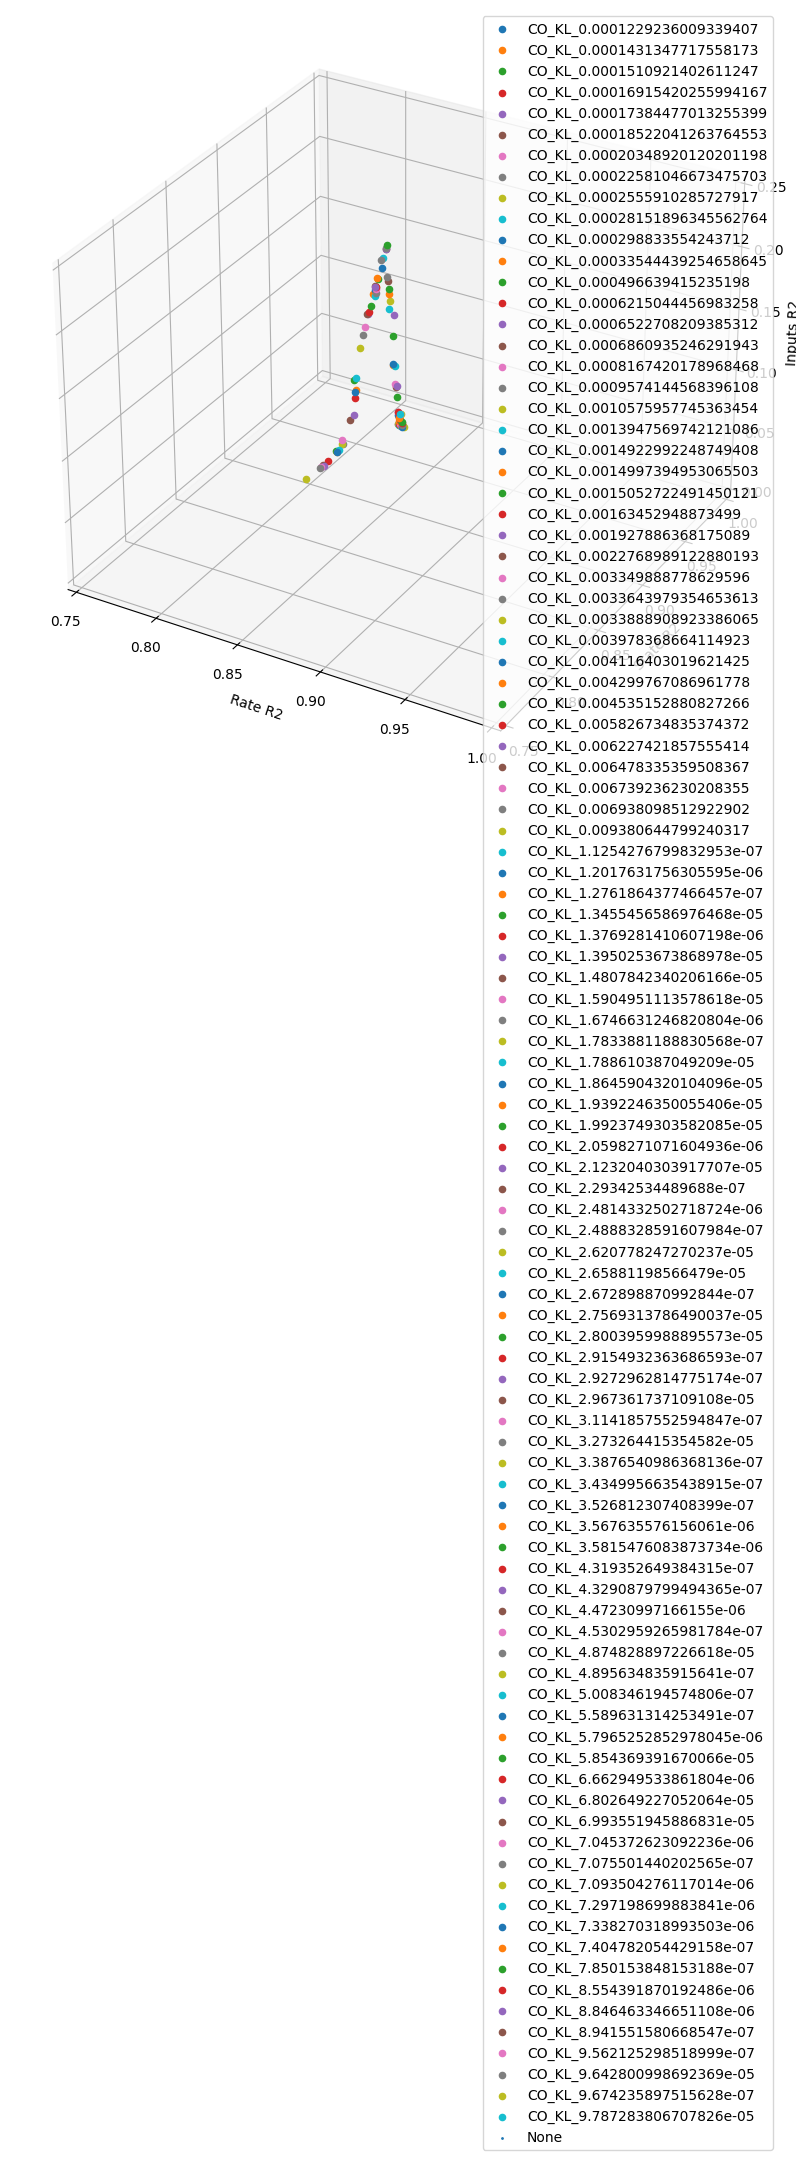

In [6]:
# Find the indices of the groups
fig = plt.figure(figsize=(10, 10))
figState_input = plt.figure(figsize=(10, 10))
figRate_input = plt.figure(figsize=(10, 10))
fig3D = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)
axState = figState_input.add_subplot(111)
axRate = figRate_input.add_subplot(111)
ax3D = fig3D.add_subplot(111, projection='3d')

for key, value in group_dict.items():
    print(key)
    if key is not "None":

        ax.scatter(rate_state_inputs[value,0], rate_state_inputs[value,1], label = key)
        ax.set_xlabel("Rate R2")
        ax.set_ylabel("State R2")
        ax.set_xlim([0.15, 1.05])
        ax.set_ylim([0.15, 1.05])
        ax.plot([0.15, 1.05], [0.15, 1.05], 'k--', lw=1)



        axState.scatter(rate_state_inputs[value,2], rate_state_inputs[value,1], label = key)
        axState.set_xlabel("Input R2")
        axState.set_ylabel("State R2")

        axRate.scatter(rate_state_inputs[value,2], rate_state_inputs[value,0], label = key)
        axRate.set_xlabel("Input R2")
        axRate.set_ylabel("Rate R2")

        ax3D.scatter(rate_state_inputs[value,0], rate_state_inputs[value,1], rate_state_inputs[value,2], label = key)
        ax3D.set_xlabel("Rate R2")
        ax3D.set_ylabel("State R2")
        ax3D.set_zlabel("Inputs R2")
        ax3D.set_xlim([0.75, 1.0])
        ax3D.set_ylim([0.75, 1.0])
        ax3D.set_zlim([0.0, 0.25])

ax.legend()
# Save figState_input
fig.savefig("RateStateComparison.pdf")

axState.legend()
figState_input.savefig("State_Inputcomparison.pdf")

axRate.legend()

figRate_input.savefig("Rate_Inputcomparison.pdf")
ax3D.legend()
fig3D.savefig("R2_comparison.pdf")



In [7]:
print(len(comparison.analyses))

101


In [8]:
analyses = comparison.analyses
metric_mat = rate_state_inputs[:,3]
high_rateR2 = rate_state_inputs[:,0] > 0.8
ref_ind = comparison.ref_ind
non_TT = [analysis for i, analysis in enumerate(analyses) if i != ref_ind]
# Remove ref_ind from metric_mat

metric_mat = np.delete(metric_mat, ref_ind, axis=0)
high_rateR2 = np.delete(high_rateR2, ref_ind, axis=0)

metric_mat = metric_mat[high_rateR2]
non_TT = [analysis for i, analysis in enumerate(non_TT) if high_rateR2[i]]

best_ind = metric_mat.argmax()
worst_ind = metric_mat.argmin()

analysis_best_inp = non_TT[metric_mat.argmax()]
analysis_worst_inp = non_TT[metric_mat.argmin()]
print("Good model")
print(analysis_best_inp.run_name)
print("Bad Model")
print(analysis_worst_inp.run_name)

Good model
LFADS_co_kl_5.854369391670066e-05_0
Bad Model
LFADS_co_kl_0.006938098512922902_0


In [9]:
inf_inputs_best = analysis_best_inp.get_inferred_inputs()
print(inf_inputs_best.shape)

torch.Size([1000, 500, 3])


In [10]:
mean_inf_inputs_best = inf_inputs_best.mean(axis = 0)
mean_inf_inputs_best = mean_inf_inputs_best.mean(axis = 0)
print(mean_inf_inputs_best)

tensor([0.0910, 0.0584, 0.1032], grad_fn=<MeanBackward1>)


/tmp/ipykernel_3110139/3565813910.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  best_fps = analysis_best_inp.plot_fps(inputs = torch.tensor(mean_inf_inputs_best).to(analysis_best_inp.model.device), q_thresh = 1e-5)



Iteration 500/10000
q = 6.81E-03 +/- 2.74E-02
dq = 2.50E-05 +/- 1.00E-04

Iteration 1000/10000
q = 1.88E-03 +/- 7.61E-03
dq = 3.58E-06 +/- 1.45E-05

Iteration 1500/10000
q = 8.52E-04 +/- 3.51E-03
dq = 1.15E-06 +/- 4.65E-06

Iteration 2000/10000
q = 4.69E-04 +/- 1.97E-03
dq = 5.01E-07 +/- 2.07E-06

Iteration 2500/10000
q = 2.88E-04 +/- 1.22E-03
dq = 2.58E-07 +/- 1.11E-06

Iteration 3000/10000
q = 1.89E-04 +/- 7.97E-04
dq = 1.50E-07 +/- 6.56E-07

Iteration 3500/10000
q = 1.29E-04 +/- 5.40E-04
dq = 9.54E-08 +/- 4.15E-07

Iteration 4000/10000
q = 8.96E-05 +/- 3.76E-04
dq = 6.34E-08 +/- 2.70E-07

Iteration 4500/10000
q = 6.33E-05 +/- 2.69E-04
dq = 4.35E-08 +/- 1.81E-07

Iteration 5000/10000
q = 4.50E-05 +/- 1.95E-04
dq = 3.08E-08 +/- 1.28E-07

Iteration 5500/10000
q = 3.18E-05 +/- 1.42E-04
dq = 2.23E-08 +/- 9.40E-08

Iteration 6000/10000
q = 2.23E-05 +/- 1.03E-04
dq = 1.62E-08 +/- 6.97E-08

Iteration 6500/10000
q = 1.55E-05 +/- 7.39E-05
dq = 1.17E-08 +/- 5.16E-08

Iteration 7000/10000
q = 

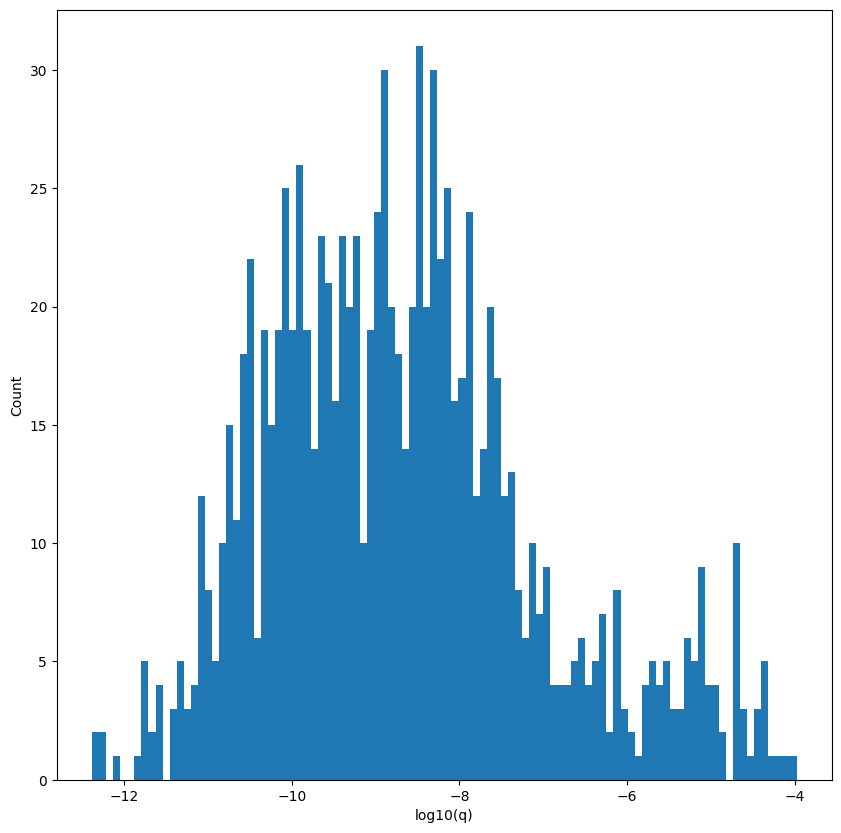

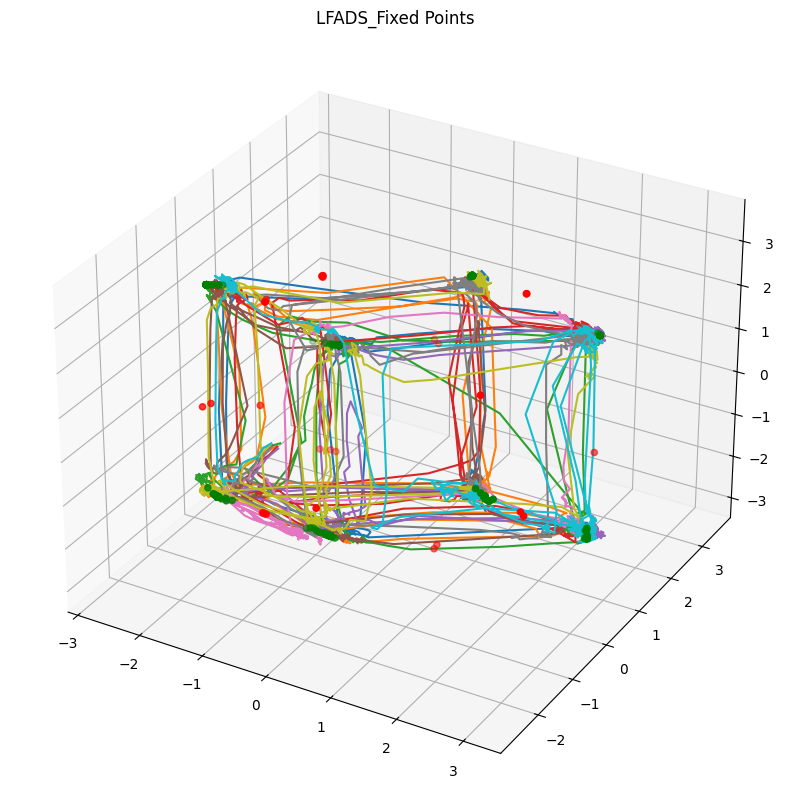

In [11]:

best_fps = analysis_best_inp.plot_fps(inputs = torch.tensor(mean_inf_inputs_best).to(analysis_best_inp.model.device), q_thresh = 1e-5)

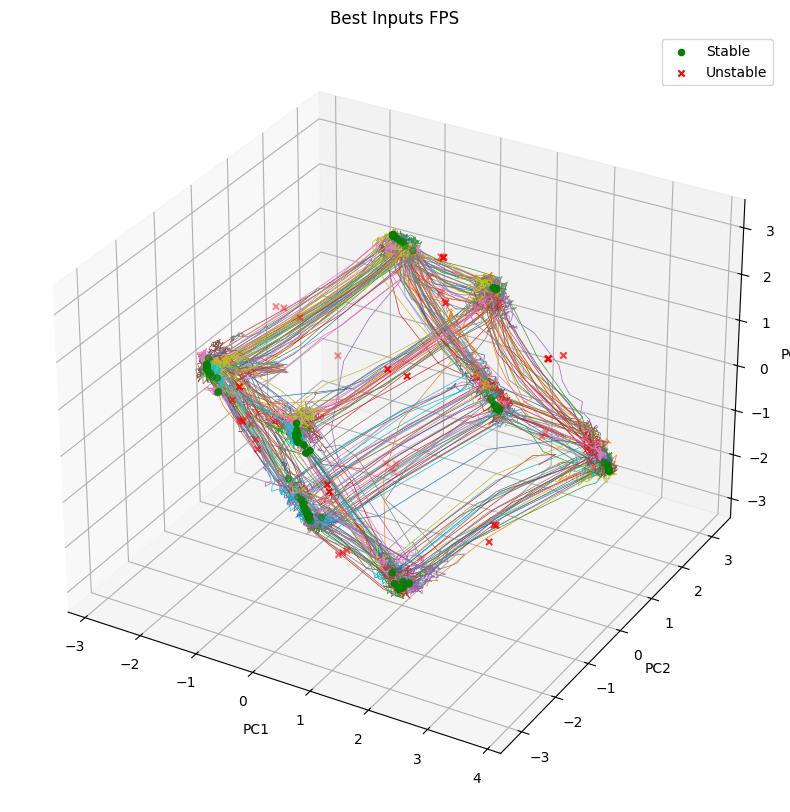

In [12]:
_,latents = analysis_best_inp.get_model_outputs(phase = "val")
latents = latents.detach().cpu().numpy()
plot_model_fps(best_fps, latents = latents, label = "Best Inputs", q_thresh=1e-3)

tensor([0.7453, 0.7731, 0.7417], grad_fn=<MeanBackward1>)


/tmp/ipykernel_3110139/867143022.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  worst_fps = analysis_worst_inp.plot_fps(inputs = torch.tensor(mean_inf_inputs_worst).to(analysis_worst_inp.model.device), q_thresh = 1e-5)



Iteration 500/10000
q = 6.83E-03 +/- 2.20E-02
dq = 2.03E-05 +/- 6.56E-05

Iteration 1000/10000
q = 2.34E-03 +/- 7.58E-03
dq = 3.75E-06 +/- 1.23E-05

Iteration 1500/10000
q = 1.21E-03 +/- 3.88E-03
dq = 1.35E-06 +/- 4.46E-06

Iteration 2000/10000
q = 7.35E-04 +/- 2.35E-03
dq = 6.48E-07 +/- 2.14E-06

Iteration 2500/10000
q = 4.92E-04 +/- 1.56E-03
dq = 3.63E-07 +/- 1.19E-06

Iteration 3000/10000
q = 3.49E-04 +/- 1.11E-03
dq = 2.25E-07 +/- 7.24E-07

Iteration 3500/10000
q = 2.58E-04 +/- 8.17E-04
dq = 1.50E-07 +/- 4.75E-07

Iteration 4000/10000
q = 1.96E-04 +/- 6.23E-04
dq = 1.05E-07 +/- 3.29E-07

Iteration 4500/10000
q = 1.51E-04 +/- 4.86E-04
dq = 7.68E-08 +/- 2.39E-07

Iteration 5000/10000
q = 1.19E-04 +/- 3.86E-04
dq = 5.77E-08 +/- 1.79E-07

Iteration 5500/10000
q = 9.47E-05 +/- 3.11E-04
dq = 4.35E-08 +/- 1.36E-07

Iteration 6000/10000
q = 7.64E-05 +/- 2.53E-04
dq = 3.38E-08 +/- 1.05E-07

Iteration 6500/10000
q = 6.22E-05 +/- 2.08E-04
dq = 2.77E-08 +/- 8.46E-08

Iteration 7000/10000
q = 

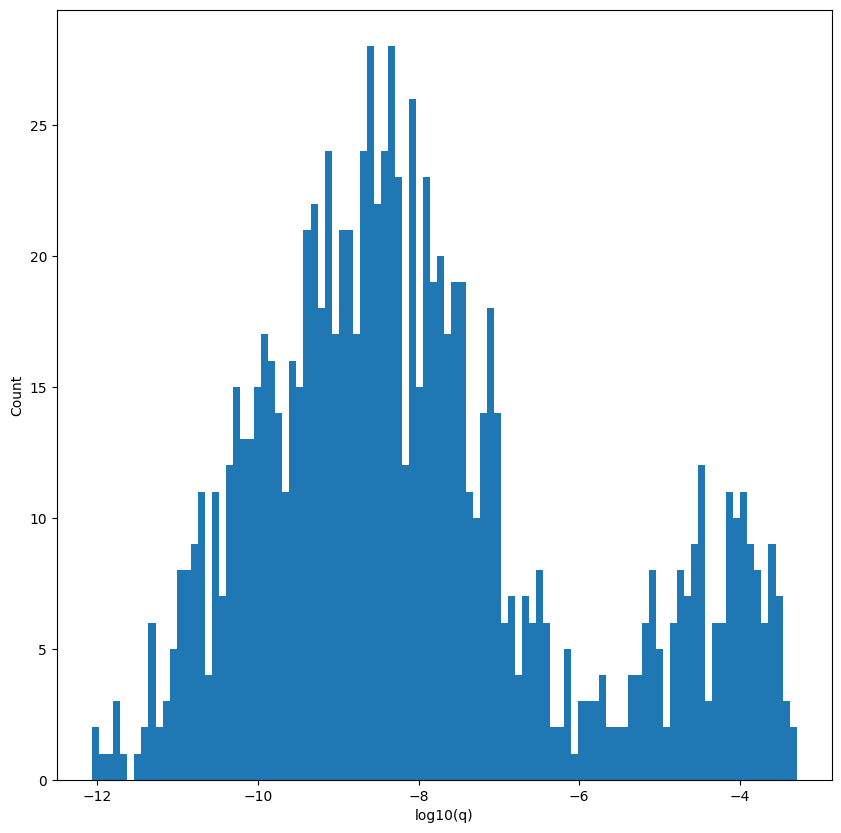

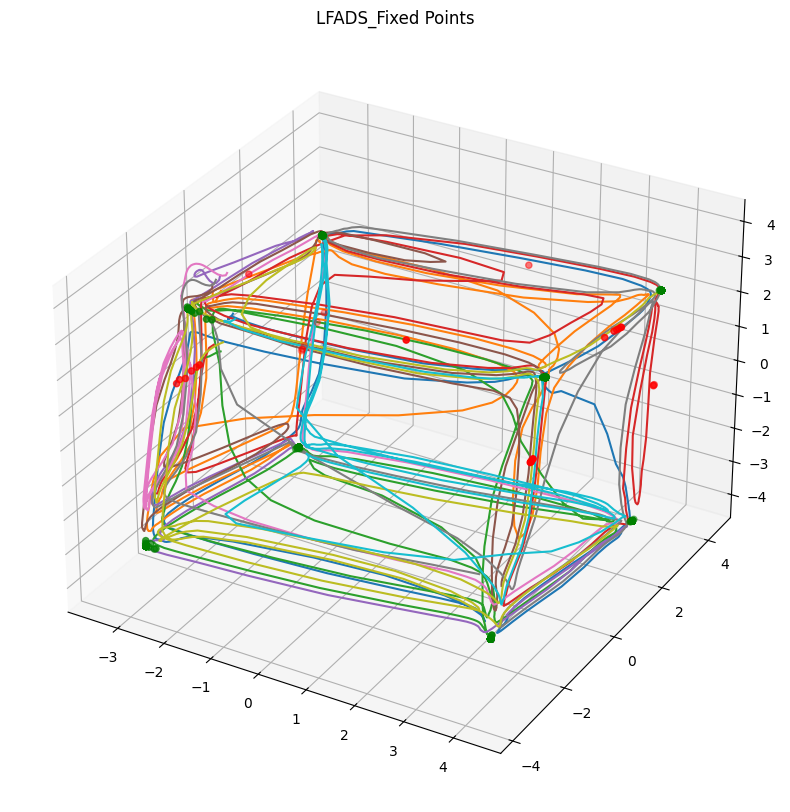

In [13]:
worst_inputs = analysis_worst_inp.get_inferred_inputs(phase='val')
mean_inf_inputs_worst = worst_inputs.mean(axis = 0)
mean_inf_inputs_worst = mean_inf_inputs_worst.mean(axis = 0)
print(mean_inf_inputs_worst)

worst_fps = analysis_worst_inp.plot_fps(inputs = torch.tensor(mean_inf_inputs_worst).to(analysis_worst_inp.model.device), q_thresh = 1e-5)

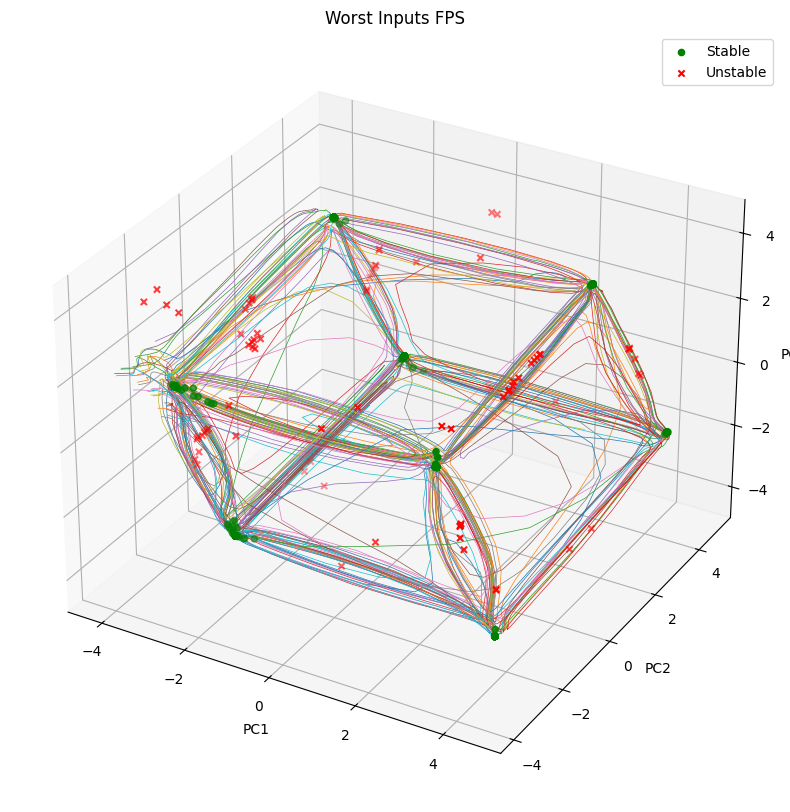

In [14]:
latents_worst = analysis_worst_inp.get_model_outputs(phase = "val")[1].detach().cpu().numpy()
plot_model_fps(worst_fps, latents = latents_worst, label = "Worst Inputs", q_thresh=1e-4)

In [15]:
true_inputs = an_TT.get_true_inputs(phase= 'val').detach().cpu().numpy()
out_dict = an_TT.get_model_outputs(phase = 'val')
controlled = out_dict['controlled'].detach().numpy()

worst_inputs = analysis_worst_inp.get_inferred_inputs(phase='val').detach().cpu().numpy()
best_inputs = analysis_best_inp.get_inferred_inputs(phase ='val').detach().cpu().numpy()


n_trials, n_time, n_inputs = true_inputs.shape
n_inputs_inf = best_inputs.shape[-1]

flat_true_inputs = true_inputs.reshape(-1, true_inputs.shape[-1])
flat_inf_inputs_best = best_inputs.reshape(-1, best_inputs.shape[-1])
flat_inf_inputs_worst = worst_inputs.reshape(-1, worst_inputs.shape[-1])

reg = LinearRegression().fit(flat_inf_inputs_best, flat_true_inputs)
r2 = reg.score(flat_inf_inputs_best, flat_true_inputs)
rot_inf_inputs_best = reg.predict(flat_inf_inputs_best)
rot_inf_inputs_best = rot_inf_inputs_best.reshape(true_inputs.shape)

reg_worst = LinearRegression().fit(flat_inf_inputs_worst, flat_true_inputs)
r2_worst = reg_worst.score(flat_inf_inputs_worst, flat_true_inputs)
rot_inf_inputs_worst = reg_worst.predict(flat_inf_inputs_worst)
rot_inf_inputs_worst = rot_inf_inputs_worst.reshape(true_inputs.shape)



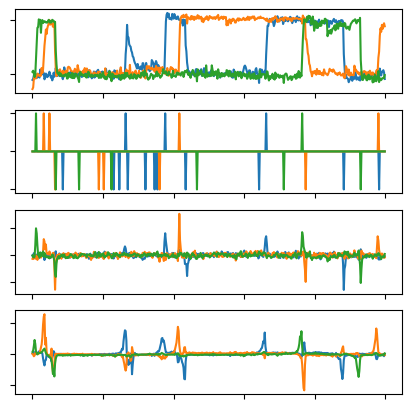

In [16]:
fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(411)
ax.plot(controlled[0], label = "Controlled")
# ax.set_ylabel("True State")
ax.set_xticklabels([])

ax.set_yticklabels([])
ax = fig.add_subplot(412)
ax.plot(true_inputs[0], label = "True Inputs")
# ax.set_ylabel("True Inputs")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(413)
ax.plot(rot_inf_inputs_best[0], label = "Inferred Inputs Best")
# ax.set_ylabel("Inf Inputs (Best)")
ax.set_xticklabels([])

ax.set_yticklabels([])
ax = fig.add_subplot(414)
ax.plot(rot_inf_inputs_worst[0], label = "Inferred Inputs Worst")
# ax.set_ylabel("Inf Inputs (Worst)")
# ax.set_xlabel("Time (bins)")

ax.set_xticklabels([])

ax.set_yticklabels([])
plt.savefig("input_comparison.pdf")



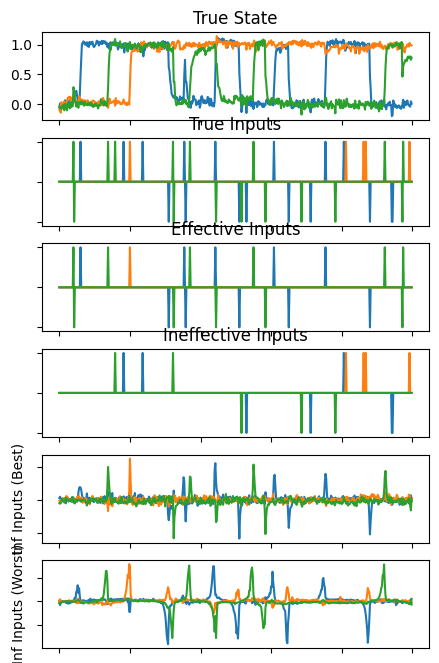

In [17]:
def effective_inputs(inputs):
    B, T, N = inputs.shape
    states = np.zeros((B, N), dtype=int)
    effective = np.zeros_like(inputs, dtype=int)
    
    for t in range(T):
        for b in range(B):
            for n in range(N):
                input_val = inputs[b, t, n]
                current_state = states[b, n]
                if input_val == 1:
                    if current_state == 0:
                        effective[b, t, n] = 1
                        states[b, n] = 1
                elif input_val == -1:
                    if current_state == 1:
                        effective[b, t, n] = -1
                        states[b, n] = 0
                        
    return effective

def ineffective_inputs(inputs):
    B, T, N = inputs.shape
    states = np.zeros((B, N), dtype=int)
    ineffective = np.zeros_like(inputs, dtype=int)
    
    for t in range(T):
        for b in range(B):
            for n in range(N):
                input_val = inputs[b, t, n]
                current_state = states[b, n]
                if input_val == 1:
                    if current_state == 1:
                        ineffective[b, t, n] = 1
                elif input_val == -1:
                    if current_state == 0:
                        ineffective[b, t, n] = -1
                # Update state regardless of effectiveness
                if input_val == 1 and current_state == 0:
                    states[b, n] = 1
                elif input_val == -1 and current_state == 1:
                    states[b, n] = 0
    
    return ineffective

states_flat = controlled.reshape(-1, controlled.shape[-1])
# Set states_flat to zero if less than 0.1
states_flat = np.where(states_flat < 0.1, 0, states_flat)
# Set states_flat to 1 if greater than 0.1
states_flat = np.where(states_flat >= 0.1, 1, states_flat)
states = states_flat.reshape(controlled.shape)
effective_inputs_mat = effective_inputs(true_inputs)
ineffective_inputs_mat = ineffective_inputs(true_inputs)

            
trial_num =1    
fig = plt.figure(figsize = [5,8])
ax = fig.add_subplot(611)
ax.plot(controlled[trial_num], label = "Controlled")
ax.set_xticklabels([])

ax.set_title("True State")
# ax.set_xticklabels([])
# ax.set_yticklabels([])

ax = fig.add_subplot(612)
ax.plot(true_inputs[trial_num], label = "True Inputs")
ax.set_title("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(613)
ax.plot(effective_inputs_mat[trial_num], label = "Effective Inputs")
ax.set_title("Effective Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(614)
ax.plot(ineffective_inputs_mat[trial_num], label = "Ineffective Inputs")
ax.set_title("Ineffective Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])


ax = fig.add_subplot(615)
ax.plot(rot_inf_inputs_best[trial_num], label = "Inferred Inputs Best")
ax.set_ylabel("Inf Inputs (Best)")
# ax.set_xlabel("Time (bins)")
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(616)
ax.plot(rot_inf_inputs_worst[trial_num], label = "Inferred Inputs Worst")
ax.set_ylabel("Inf Inputs (Worst)")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig("eff_input_comparison.pdf")


effective_inputs_flat = effective_inputs_mat.reshape(-1, effective_inputs_mat.shape[-1])
true_inputs_flat = true_inputs.reshape(-1, true_inputs.shape[-1])

In [18]:

def compute_psth(inputs, signal, window=10):
    """
    Computes PSTH for a second signal based on when the inputs are +1 and -1.
    
    Args:
    inputs (np.ndarray): A BxTxN tensor of inputs.
    signal (np.ndarray): A BxTxN tensor of the second signal.
    window (int): The number of time steps before and after the event to consider.
    
    Returns:
    tuple: PSTHs for +1 inputs and -1 inputs for each dimension.
    """
    B, T, N = inputs.shape
    
    psth_plus = [[] for _ in range(N)]
    psth_minus = [[] for _ in range(N)]
    
    for b in range(B):
        for t in range(T):
            for n in range(N):
                if inputs[b, t, n] == 1:
                    if t >= window and t < T - window:
                        psth_plus[n].append(signal[b, t-window:t+window+1, n])
                elif inputs[b, t, n] == -1:
                    if t >= window and t < T - window:
                        psth_minus[n].append(signal[b, t-window:t+window+1, n])
    
    # Compute the average PSTH for +1 and -1 inputs for each dimension
    psth_plus = [np.mean(psth, axis=0) if psth else np.zeros((2*window + 1,)) for psth in psth_plus]
    psth_minus = [np.mean(psth, axis=0) if psth else np.zeros((2*window + 1,)) for psth in psth_minus]
    
    return psth_plus, psth_minus

In [19]:
psth_plus_eff, psth_minus_eff = compute_psth(effective_inputs_mat, rot_inf_inputs_best)
psth_plus_ineff, psth_minus_ineff = compute_psth(ineffective_inputs_mat, rot_inf_inputs_best)

(200, 500, 3)


(-0.06, 0.06)

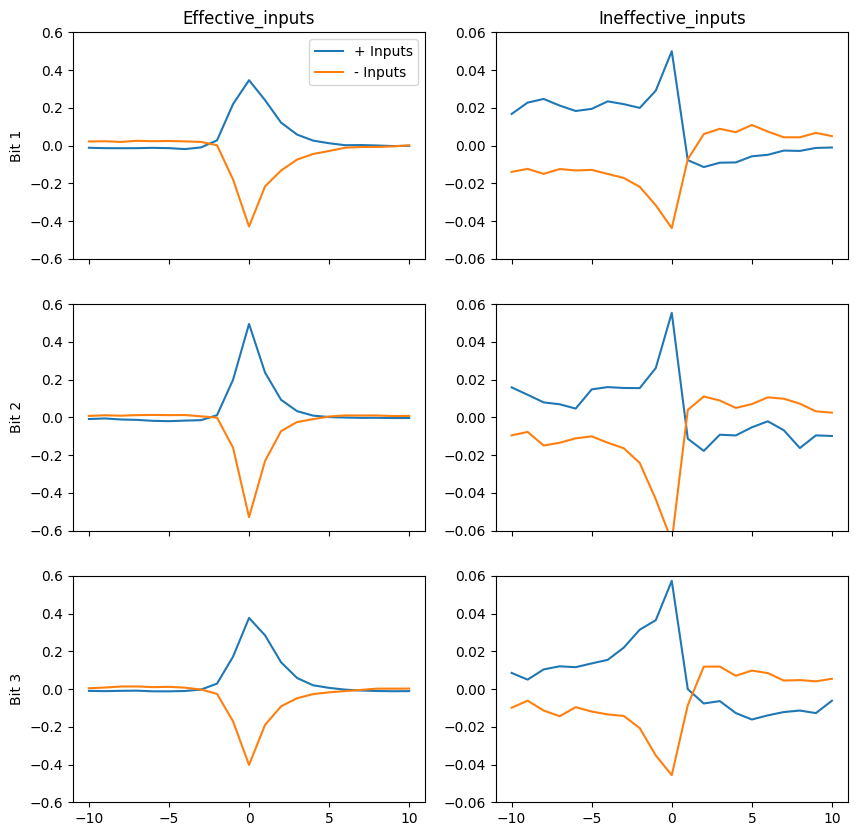

In [20]:
print(effective_inputs_mat.shape)
timeVec = np.arange(-10, 11)
fig = plt.figure(figsize = [10,10])
ax1 = fig.add_subplot(321)
ax1.plot(timeVec, psth_plus_eff[0], label = "+ Inputs")
ax1.plot(timeVec, psth_minus_eff[0], label = "- Inputs")
ax1.set_xticklabels([])
ax1.set_title('Effective_inputs')
ax1.set_ylabel("Bit 1")
ax1.set_ylim(-0.6, 0.6)
ax1.legend()

ax2 = fig.add_subplot(322)
ax2.plot(timeVec, psth_plus_ineff[0])
ax2.plot(timeVec, psth_minus_ineff[0])
ax2.set_title('Ineffective_inputs')

ax2.set_ylim(-0.06, 0.06)
ax2.set_xticklabels([])

ax3 = fig.add_subplot(323)
ax3.plot(timeVec, psth_plus_eff[1])
ax3.plot(timeVec, psth_minus_eff[1])
ax3.set_xticklabels([])

ax3.set_ylim(-0.6, 0.6)
ax3.set_ylabel("Bit 2")

ax4 = fig.add_subplot(324)
ax4.plot(timeVec, psth_plus_ineff[1])
ax4.plot(timeVec, psth_minus_ineff[1])
ax4.set_xticklabels([])

ax4.set_ylim(-0.06, 0.06)

ax5 = fig.add_subplot(325)
ax5.plot(timeVec, psth_plus_eff[2])
ax5.plot(timeVec, psth_minus_eff[2])
ax5.set_ylabel("Bit 3")

ax5.set_ylim(-0.6, 0.6)


ax6 = fig.add_subplot(326)
ax6.plot(timeVec, psth_plus_ineff[2])
ax6.plot(timeVec, psth_minus_ineff[2])

ax6.set_ylim(-0.06, 0.06)


0.37841791922377954


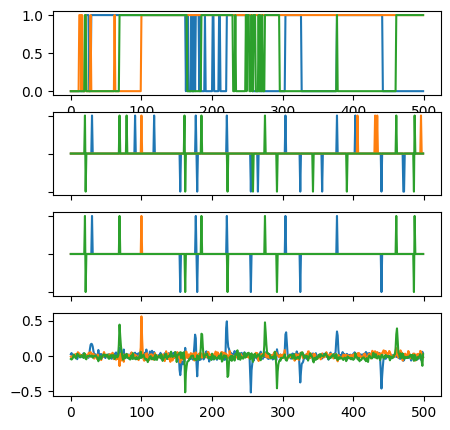

In [21]:
# Smooth the effective inputs
def smooth_rows(arr, window_size=1):
    kernel = np.ones(window_size) / window_size
    smoothed_arr = np.array([np.convolve(row, kernel, mode='same') for row in arr])
    return smoothed_arr

s_eff_inputs = smooth_rows(effective_inputs_flat.T).T
s_inf_inputs = smooth_rows(flat_inf_inputs_best.T).T

reg = LinearRegression().fit(s_inf_inputs, s_eff_inputs)
r2_effective = reg.score(s_inf_inputs, s_eff_inputs)
s_inf_inputs_rot = reg.predict(s_inf_inputs)
rot_inf_inputs_best_effective = s_inf_inputs_rot.reshape(true_inputs.shape)
print(r2_effective)

s_effective_inputs = s_eff_inputs.reshape(true_inputs.shape)


fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(411)
ax.plot(states[trial_num], label = "Controlled")
# ax.set_ylabel("True State")
# ax.set_xticklabels([])
# ax.set_yticklabels([])
ax = fig.add_subplot(412)
ax.plot(true_inputs[trial_num], label = "True Inputs")
# ax.set_ylabel("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(413)
ax.plot(s_effective_inputs[trial_num], label = "Effective Inputs")
# ax.set_ylabel("True Inputs")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax = fig.add_subplot(414)
ax.plot(rot_inf_inputs_best_effective[trial_num], label = "Inferred Inputs Best")



In [22]:
from ctd.comparison.fixedpoints import find_fixed_points
worst_controller = analysis_worst_inp.model.decoder.rnn.cell.con_cell
state_trajs = 5*np.random.randn(1024, 30, 128)
state_trajs = torch.tensor(state_trajs).float()
fps = find_fixed_points(
    model = worst_controller,
    state_trajs= state_trajs,
    inputs= torch.zeros((1024, 30, 276)),
    n_inits=1024,
    noise_scale=0.0,
    learning_rate=1e-2,
    max_iters=10000,
    device="cpu",
    seed=0,
    compute_jacobians=True,
)


Iteration 500/10000
q = 6.42E+01 +/- 3.22E+01
dq = 2.56E-01 +/- 1.19E-01

Iteration 1000/10000
q = 1.06E+01 +/- 7.70E+00
dq = 3.41E-02 +/- 2.09E-02

Iteration 1500/10000
q = 2.50E+00 +/- 2.10E+00
dq = 6.17E-03 +/- 5.51E-03

Iteration 2000/10000
q = 9.27E-01 +/- 5.99E-01
dq = 1.43E-03 +/- 1.62E-03

Iteration 2500/10000
q = 5.10E-01 +/- 2.17E-01
dq = 4.80E-04 +/- 4.15E-04

Iteration 3000/10000
q = 3.41E-01 +/- 1.23E-01
dq = 2.41E-04 +/- 1.30E-04

Iteration 3500/10000
q = 2.46E-01 +/- 8.72E-02
dq = 1.50E-04 +/- 6.35E-05

Iteration 4000/10000
q = 1.85E-01 +/- 6.49E-02
dq = 1.02E-04 +/- 4.20E-05

Iteration 4500/10000
q = 1.41E-01 +/- 4.95E-02
dq = 7.32E-05 +/- 3.22E-05

Iteration 5000/10000
q = 1.10E-01 +/- 3.85E-02
dq = 5.51E-05 +/- 2.57E-05

Iteration 5500/10000
q = 8.65E-02 +/- 3.03E-02
dq = 4.12E-05 +/- 1.95E-05

Iteration 6000/10000
q = 6.87E-02 +/- 2.41E-02
dq = 3.14E-05 +/- 1.62E-05

Iteration 6500/10000
q = 5.49E-02 +/- 1.93E-02
dq = 2.45E-05 +/- 1.33E-05

Iteration 7000/10000
q = 

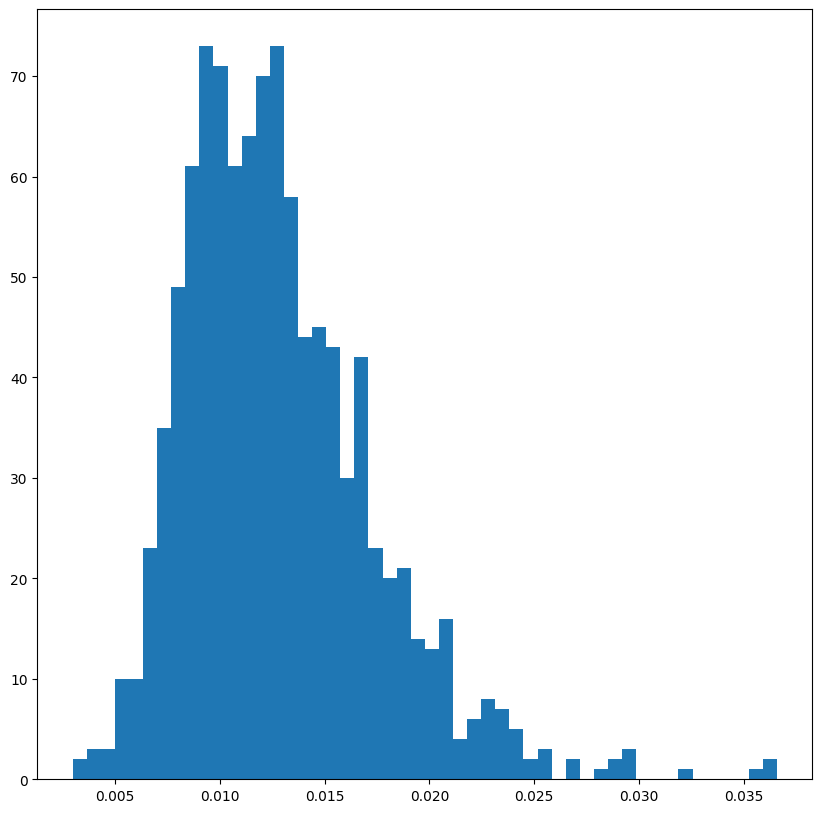

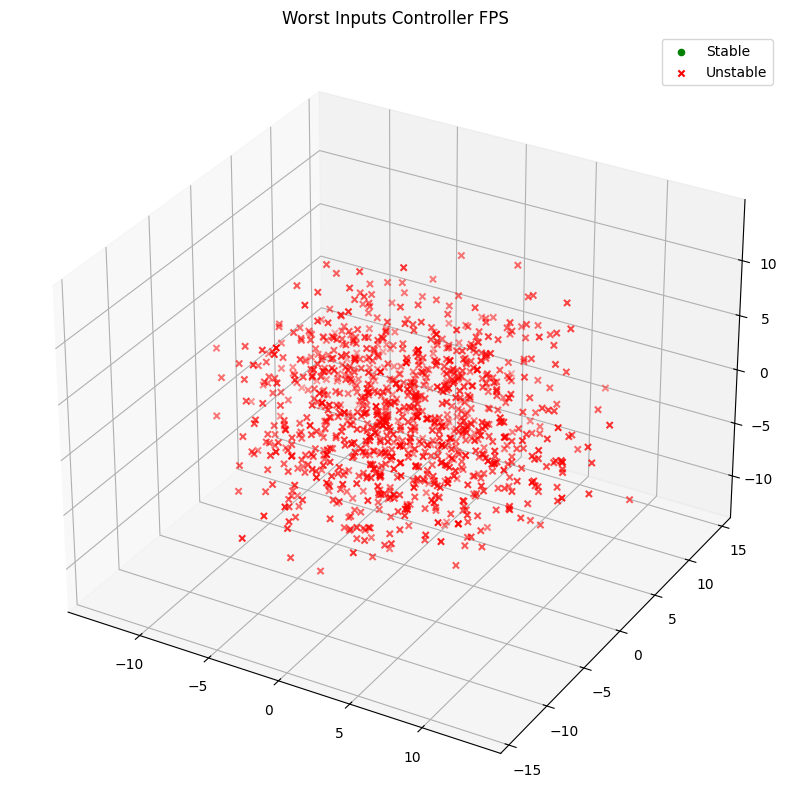

In [23]:
xstar = fps.xstar
qstar = fps.qstar
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.hist(qstar, bins=50)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x_star = xstar
q_star = fps.qstar
q_flag = q_star < 0.03
stability= fps.is_stable
x_star = x_star[q_flag]
q_star = q_star[q_flag]
pca = PCA(n_components=3)
x_star = pca.fit_transform(x_star)
stability = stability[q_flag]

stable_X = x_star[stability]
unstable_X = x_star[~stability]
ax.scatter(stable_X[:,0], stable_X[:,1], stable_X[:,2], c='g', marker='o', label = "Stable")
ax.scatter(unstable_X[:,0], unstable_X[:,1], unstable_X[:,2], c='r', marker='x', label = "Unstable")
ax.set_title("Worst Inputs Controller FPS")
ax.legend()


LFADS_co_kl_5.854369391670066e-05_0
LFADS_co_kl_0.0013947569742121086_0


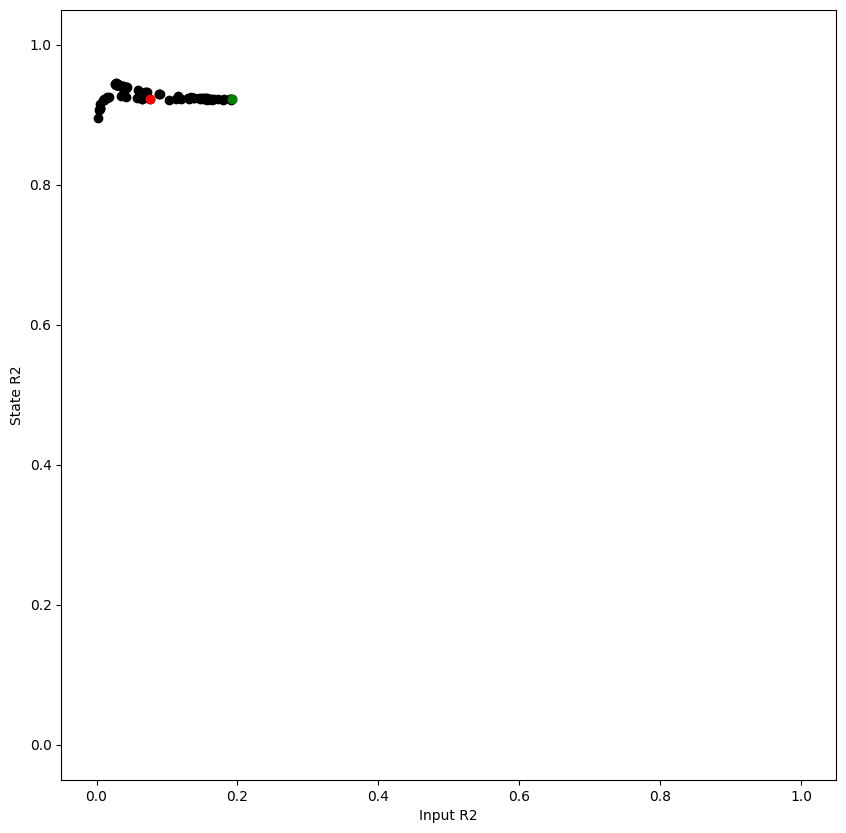

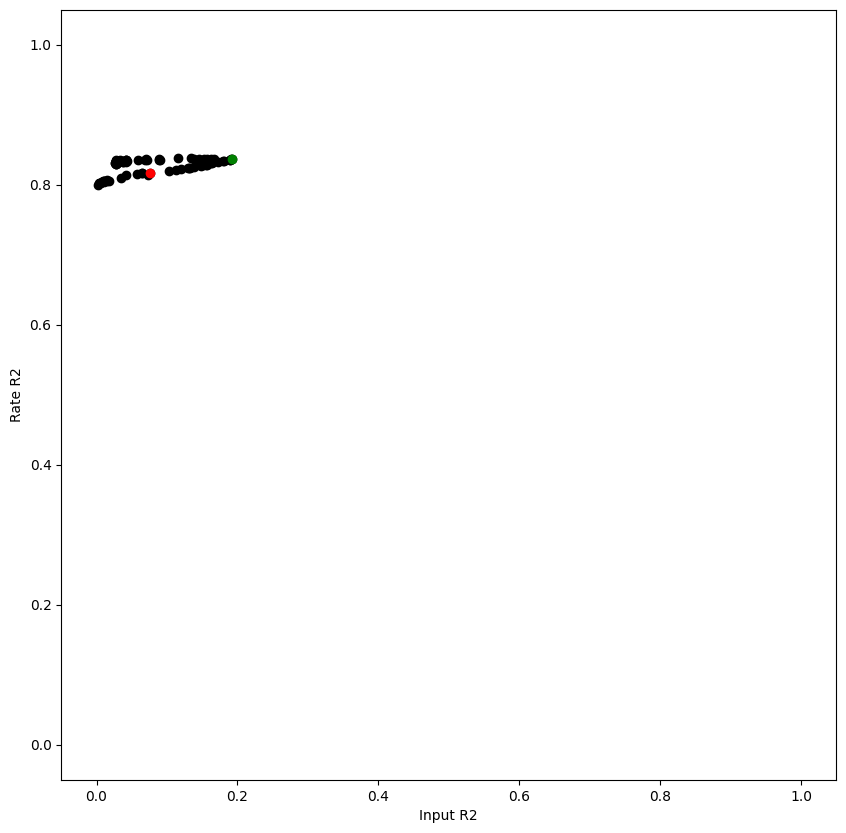

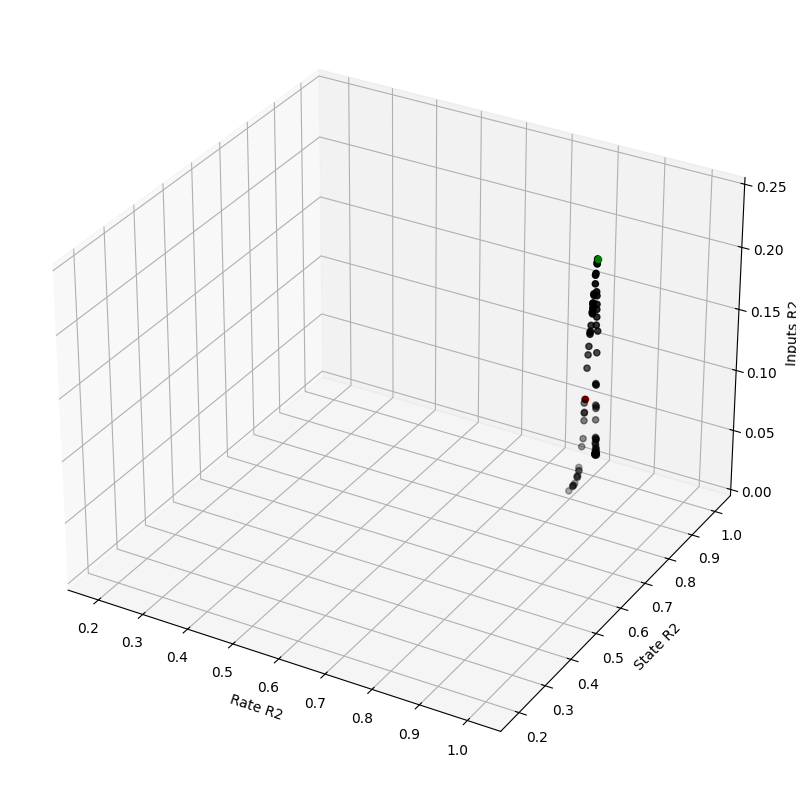

In [24]:
rate_state_inputs2 = [row for i, row in enumerate(rate_state_inputs) if i != ref_ind]
rate_state_inputs2 = np.array(rate_state_inputs2)
good_ind = np.argmax(rate_state_inputs2[:,3])
bad_ind = 19
print(analyses[good_ind].run_name)
print(analyses[bad_ind].run_name)
figState_input = plt.figure(figsize=(10,10))
ax = figState_input.add_subplot(111)
ax.scatter(rate_state_inputs2[:,2], rate_state_inputs2[:,1], color = 'k')
ax.scatter(rate_state_inputs2[good_ind,2], rate_state_inputs2[good_ind,1], color = 'g')
ax.scatter(rate_state_inputs2[bad_ind,2], rate_state_inputs2[bad_ind,1], color = 'r')
ax.set_xlabel("Input R2")
ax.set_ylabel("State R2")

ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
plt.savefig("state_input.pdf")

figRate_input = plt.figure(figsize = (10,10))
axRate = figRate_input.add_subplot(111)
axRate.scatter(rate_state_inputs2[:,2], rate_state_inputs2[:,0], color = 'k')
axRate.scatter(rate_state_inputs2[good_ind,2], rate_state_inputs2[good_ind,0], color = 'g')
axRate.scatter(rate_state_inputs2[bad_ind,2], rate_state_inputs2[bad_ind,0], color = 'r')
axRate.set_xlabel("Input R2")
axRate.set_ylabel("Rate R2")

axRate.set_xlim([-0.05, 1.05])
axRate.set_ylim([-0.05, 1.05])
plt.savefig("rate_input.pdf")

fig3D = plt.figure(figsize = (10,10))
ax3D = fig3D.add_subplot(111, projection='3d')
ax3D.scatter(rate_state_inputs2[:,0], rate_state_inputs2[:,1], rate_state_inputs2[:,2], color = 'k')
ax3D.scatter(rate_state_inputs2[good_ind,0], rate_state_inputs2[good_ind,1], rate_state_inputs2[good_ind,2], color = 'g')
ax3D.scatter(rate_state_inputs2[bad_ind,0], rate_state_inputs2[bad_ind,1], rate_state_inputs2[bad_ind,2], color = 'r')
ax3D.set_xlabel("Rate R2")
ax3D.set_ylabel("State R2")
ax3D.set_zlabel("Inputs R2")
ax3D.set_xlim([0.15, 1.05])
ax3D.set_ylim([0.15, 1.05])
ax3D.set_zlim([0.0, 0.25])
plt.savefig("3d.pdf")

In [25]:
comparison_single = Comparison(comparison_tag="Figure1NBFF_TTGRU_DTNODE_Single")
comparison_single.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_single.load_analysis(analysis_NODE, group = "NODE")
comparison_single.load_analysis(analysis_LDS, group = "LDS")
comparison_single.load_analysis(analysis_GRU, group = "GRU")
comparison_single.regroup()

#comparison_single.plot_trials_reference(num_trials =2, num_pcs=4)
# comparison_single.plot_trials_reference_dims(num_trials=2, dims = [0,1,2,3])


NameError: name 'analysis_NODE' is not defined

In [ ]:
comparison_single.compare_dynamics_DSA(
    phase = "all",
    n_delays = 30,
    rank = 100
    )

In [ ]:

def visualize_stateR2(comp, num_trials=2, ref_ind = None, pcs_to_plot = [7,8,9,10,11]):
    self = comp
    if ref_ind is None:
        ref_ind = self.ref_ind
    if ref_ind is None and self.ref_ind is None:
        # Throw an error
        raise ValueError("No reference index provided")
    ref_lats = (
        self.analyses[ref_ind]
        .get_latents(
            phase="val",
        )
        .detach()
        .numpy()
    )
    pca = PCA()
    ref_lats_flat = ref_lats.reshape(
        ref_lats.shape[0] * ref_lats.shape[1], ref_lats.shape[2]
    )
    ref_lats_pca_flat = pca.fit_transform(ref_lats_flat)
    ref_lats_pca = ref_lats_pca_flat.reshape(ref_lats.shape)

    fig = plt.figure(figsize = (20,10))
    axes = fig.subplots(self.num_analyses, len(pcs_to_plot))
    for i in range(self.num_analyses):
        latents = self.analyses[i].get_latents(phase="val").detach().numpy()
        pca_DT = PCA()

        lats_flat = latents.reshape(
            latents.shape[0] * latents.shape[1], latents.shape[2]
        )
        lats_pca_flat = pca_DT.fit_transform(lats_flat)

        reg = LinearRegression().fit(ref_lats_pca_flat, lats_pca_flat)
        pred_latents_pca_flat = reg.predict(ref_lats_pca_flat)
        r2_scores = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='raw_values')
        var_r2_score = r2_score(lats_pca_flat, pred_latents_pca_flat, multioutput='variance_weighted')
        print(f"R2 Score for {self.analyses[i].run_name}: {var_r2_score}")
        pred_latents_pca = pred_latents_pca_flat.reshape(latents.shape)
        lats_pca = lats_pca_flat.reshape(latents.shape)

        for j in range(len(pcs_to_plot)):
            pc_num = pcs_to_plot[j] + 1
            if pc_num < latents.shape[2]:
                axes[i, j].plot(pred_latents_pca[0, :100, pc_num], c = 'r', label="Predicted from TT")
                axes[i, j].plot(lats_pca[0, :100, pc_num], c = 'k', label = "True from DT")
                axes[i, j].text(75, .01, s= f"R2: {r2_scores[pc_num]:.2f}")
            else:
                axes[i, j].plot(np.zeros(lats_pca[0, :100, 0].shape), label = "Predicted from TT") 
            if i == self.num_analyses - 1:
                axes[i, j].set_xlabel("Time")
            else:
                axes[i, j].set_xticks([])

        axes[i, 0].set_ylabel(f"{self.analyses[i].run_name}")
    plt.savefig(f"state_r2_dims.pdf")

In [ ]:
analysis_NODE.plot_scree(max_pcs = 12   )

In [ ]:
analysis_GRU.plot_scree(max_pcs = 12)

In [ ]:
analysis_LDS.plot_scree(max_pcs = 12)

In [ ]:

visualize_stateR2(comparison_single, pcs_to_plot=[7,8,9,10,11,12])

In [ ]:
fpsTT = an_TT.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_GRU = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_NODE = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
fpsDT_LDS = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    max_iters = 40000,
    learning_rate =5e-3,
)

In [ ]:
lats_TT = an_TT.get_latents().detach().numpy()
lats_GRU = analysis_GRU.get_latents().detach().numpy()
lats_NODE = analysis_NODE.get_latents().detach().numpy()
lats_LDS = analysis_LDS.get_latents().detach().numpy()

plot_model_fps(fpsTT, latents=lats_TT, q_thresh = 1e-7, label = "TT")
plot_model_fps(fpsDT_GRU, latents = lats_GRU, q_thresh = 1e-6, label = "DT_GRU")
plot_model_fps(fpsDT_NODE, latents = lats_NODE, q_thresh = 1e-7, label = "DT_NODE")
plot_model_fps(fpsDT_LDS, latents = lats_LDS, q_thresh = 1e-7, label = "DT_LDS")

In [ ]:

comparison_models = Comparison()
comparison_models.load_analysis(an_TT, reference_analysis=True, group = "TT")
comparison_models.load_analysis(analysis_GRU, group = "GRU")
comparison_models.load_analysis(analysis_NODE, group = "NODE")
comparison_models.load_analysis(analysis_LDS, group = "LDS")
comparison_models.regroup()

In [ ]:
comparison_models.plot_trials_reference(num_trials=2, num_pcs=4)

In [ ]:
lds_fps = analysis_LDS.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 1e-3,
    n_inits=1024,
    max_iters = 20000,                      
)



In [ ]:
node_fps = analysis_NODE.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
gru_fps = analysis_GRU.plot_fps(
    inputs = torch.zeros(3),
    learning_rate = 6e-4,
    n_inits=1024,
    max_iters = 50000,                      
)

In [ ]:
plot_model_fps(lds_fps, q_thresh = 1e-4)
plot_model_fps(node_fps, q_thresh = 1e-4)
plot_model_fps(gru_fps, q_thresh = 4e-7)